# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [124]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from scipy.stats import multivariate_normal
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc


%matplotlib inline

In [125]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [126]:
 ### iris data set 

In [127]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

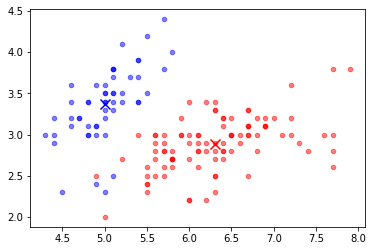

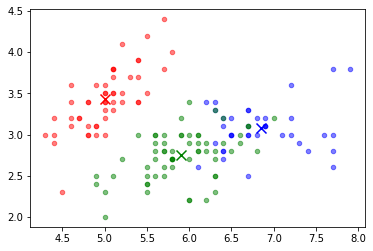

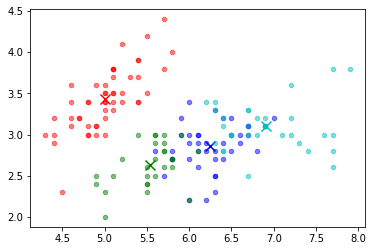

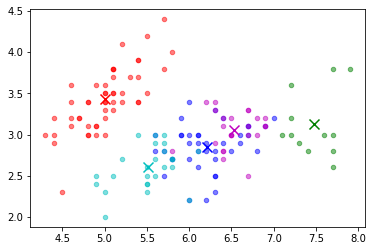

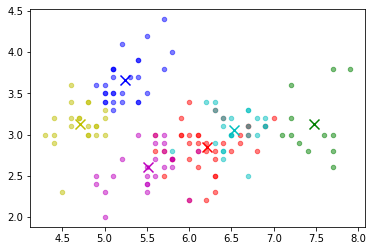

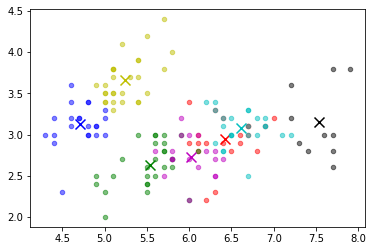

In [155]:
Sum_of_squared_distances = []
score1=[]
for clusters in range (2,8):
    kmeans = KMeans (n_clusters=clusters, init = 'k-means++', max_iter=300, n_init= 10 )
    kmeans.fit(iris_data.data)
    pd =   kmeans.fit_predict(iris_data.data)
    z=kmeans.inertia_
    Sum_of_squared_distances.append(z)
    plt.figure()
    display_cluster(iris_data.data, kmeans, clusters)
    score1.append(silhouette_score(iris_data.data,pd,metric='euclidean'))

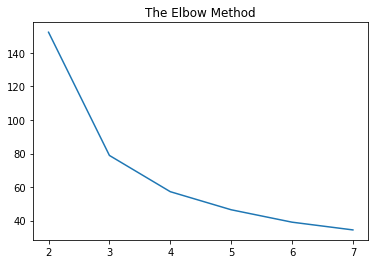

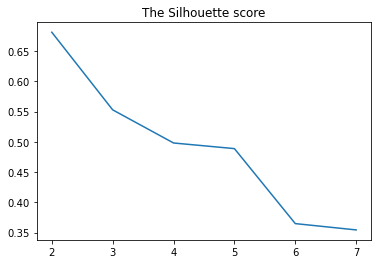

[0.681046169211746]


In [156]:
plt.plot(range(2,8), Sum_of_squared_distances)
plt.title("The Elbow Method")
plt.show()

k_range= range (2,8)
plt.plot(k_range,score1)
plt.title("The Silhouette score")
plt.show()
Best1=[]
Best1.append(max(score1))
print(Best1)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

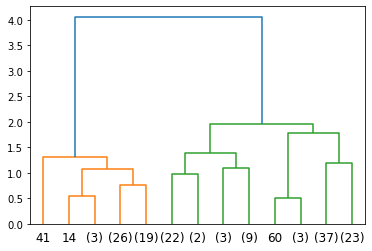

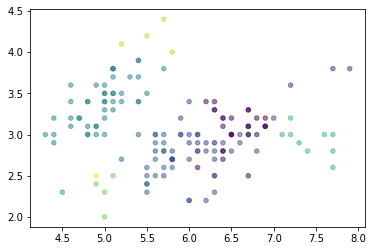

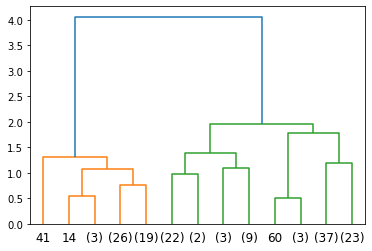

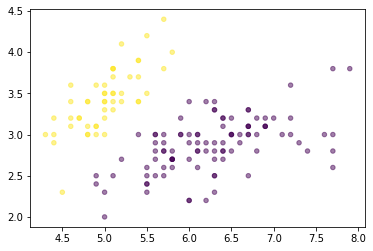

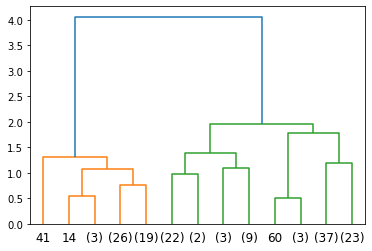

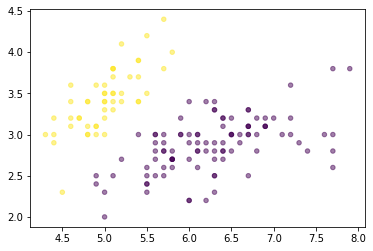

[0.6867350732769776]


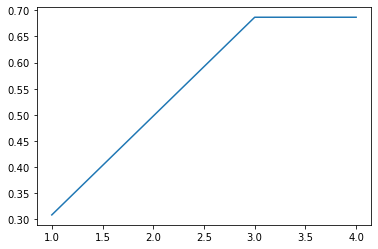

In [157]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot 
    dendrogram(linkage_matrix, **kwargs)
    
D_array=[1,3,4]
scores2=[]


for i in D_array:
    AC = AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None
        , connectivity=None, compute_full_tree='auto', linkage='average', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(AC, truncate_mode="level", p=3)
    
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = AC.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    scores2.append(silhouette_score(iris_data.data, AC.labels_, metric='euclidean'))
    
#Plotting silhouette_scores and storing the best score
plt.plot(D_array,scores2)    
Best2=[]
Best2.append(max(scores2))
print(Best2)



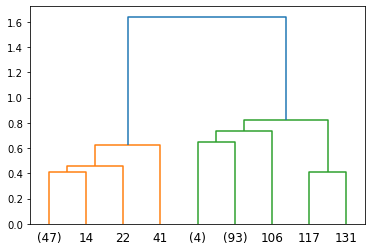

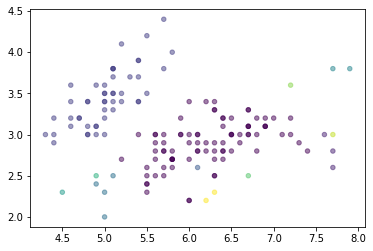

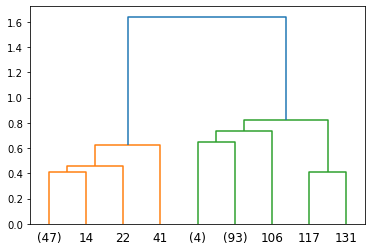

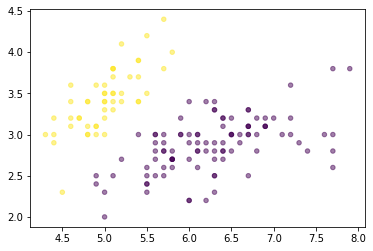

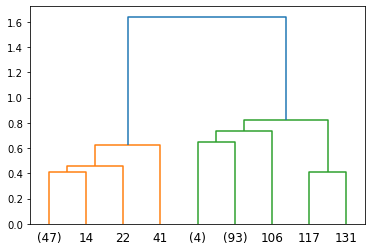

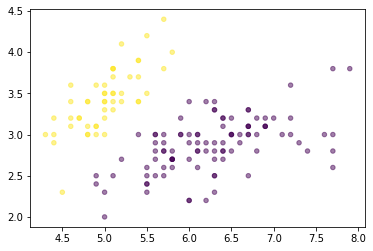

[0.6867350732769776]


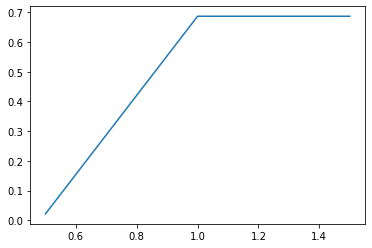

In [158]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot 
    dendrogram(linkage_matrix, **kwargs)
    
D_array=[0.5,1,1.5]
scores2=[]
threshold_distances = i

for i in D_array:
    AC = AgglomerativeClustering(n_clusters=None, affinity='euclidean', memory=None
        , connectivity=None, compute_full_tree='auto', linkage='single', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(AC, truncate_mode="level", p=3)
    
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = AC.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    scores2.append(silhouette_score(iris_data.data, AC.labels_, metric='euclidean'))
    
#Plotting silhouette_scores and storing the best score
plt.plot(D_array,scores2)    
Best2=[]
Best2.append(max(scores2))
print(Best2)



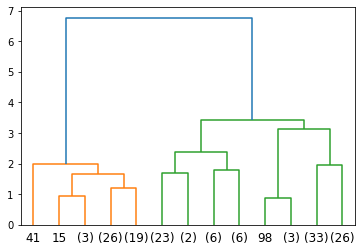

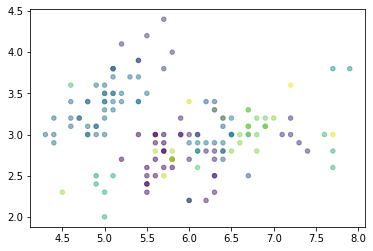

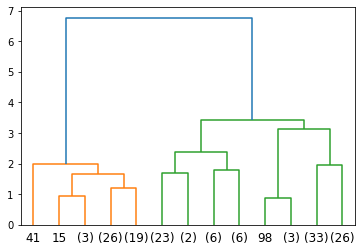

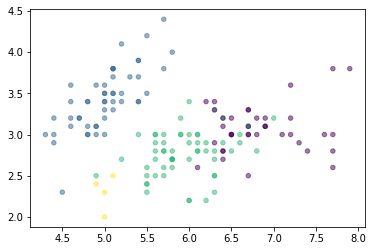

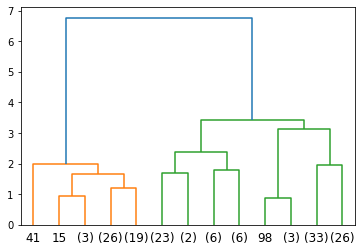

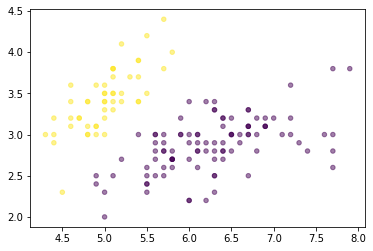

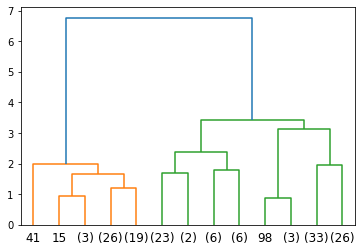

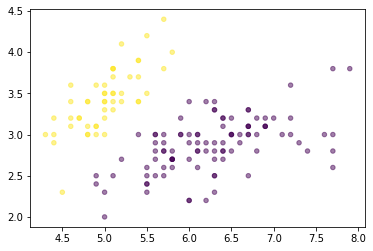

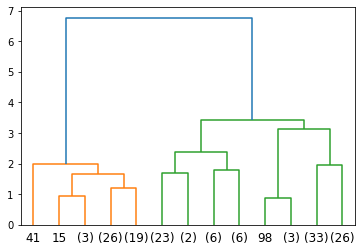

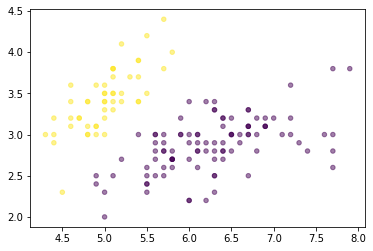

[0.6867350732769776]


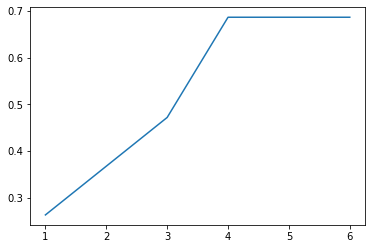

In [159]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot 
    dendrogram(linkage_matrix, **kwargs)
    
D_array=[1,3,4,5,6]
scores2=[]
threshold_distances = i

for i in D_array:
    AC = AgglomerativeClustering(n_clusters=None, affinity='manhattan', memory=None
        , connectivity=None, compute_full_tree='auto', linkage='average', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(AC, truncate_mode="level", p=3)
    
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = AC.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    scores2.append(silhouette_score(iris_data.data, AC.labels_, metric='euclidean'))
    
#Plotting silhouette_scores and storing the best score
plt.plot(D_array,scores2)    
Best2=[]
Best2.append(max(scores2))
print(Best2)



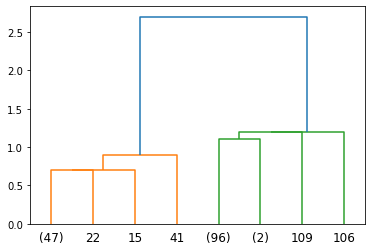

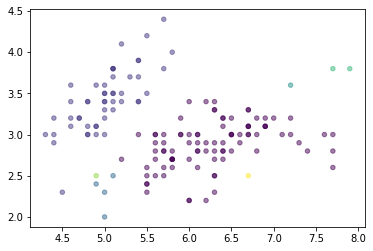

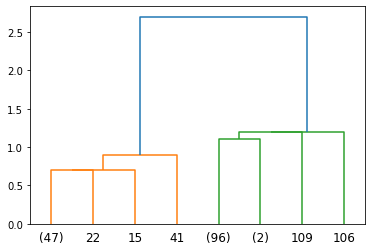

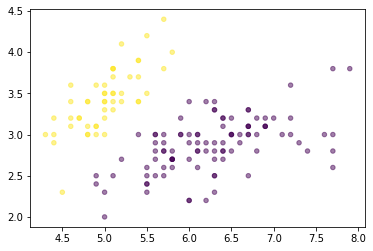

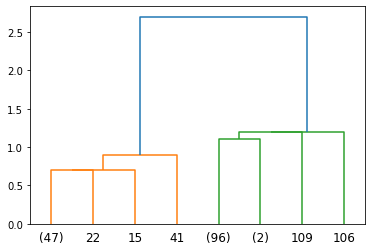

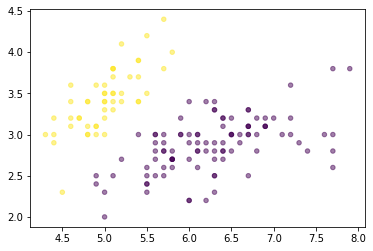

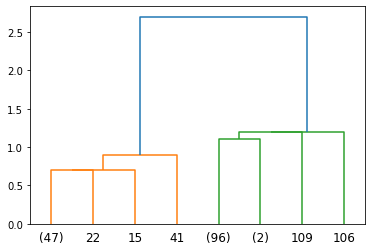

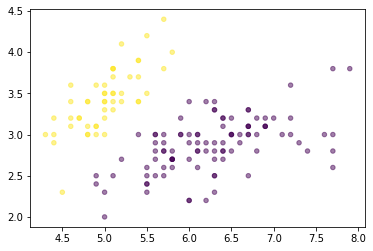

[0.6867350732769776]


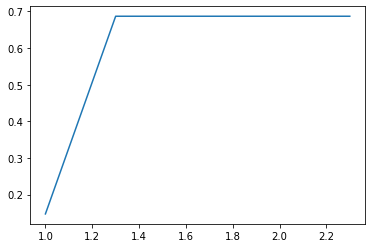

In [160]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot 
    dendrogram(linkage_matrix, **kwargs)
    
D_array=[1,1.3,2,2.3]
scores2=[]
threshold_distances = i

for i in D_array:
    AC = AgglomerativeClustering(n_clusters=None, affinity='manhattan', memory=None
        , connectivity=None, compute_full_tree='auto', linkage='single', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(AC, truncate_mode="level", p=3)
    
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = AC.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    scores2.append(silhouette_score(iris_data.data, AC.labels_, metric='euclidean'))
    
#Plotting silhouette_scores and storing the best score
plt.plot(D_array,scores2)    
Best2=[]
Best2.append(max(scores2))
print(Best2)



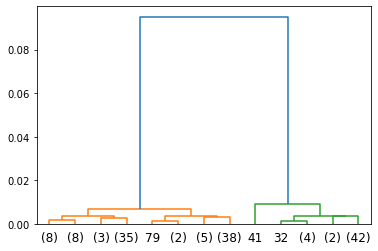

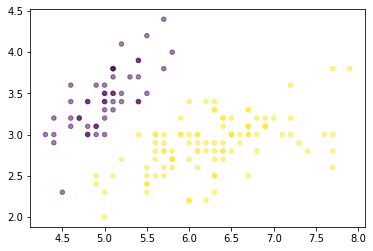

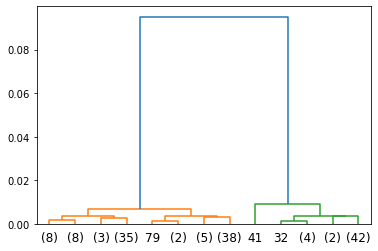

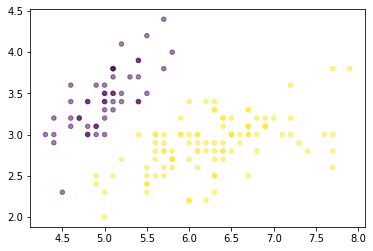

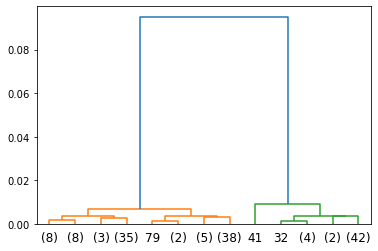

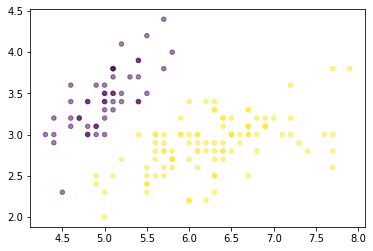

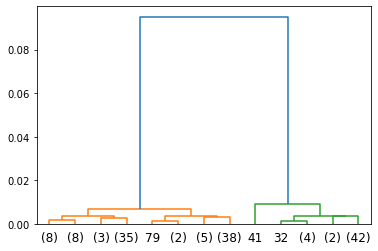

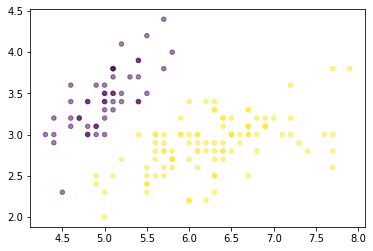

[0.6867350732769776]


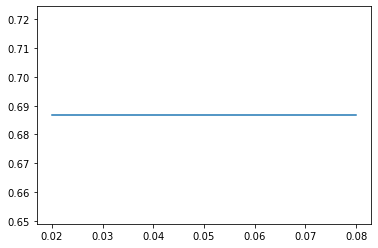

In [161]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot 
    dendrogram(linkage_matrix, **kwargs)
    
D_array=[0.02,0.04,0.06,0.08]
scores2=[]
threshold_distances = i

for i in D_array:
    AC = AgglomerativeClustering(n_clusters=None, affinity='cosine', memory=None
        , connectivity=None, compute_full_tree='auto', linkage='average', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(AC, truncate_mode="level", p=3)
    
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = AC.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    scores2.append(silhouette_score(iris_data.data, AC.labels_, metric='euclidean'))
    
#Plotting silhouette_scores and storing the best score
plt.plot(D_array,scores2)    
Best2=[]
Best2.append(max(scores2))
print(Best2)



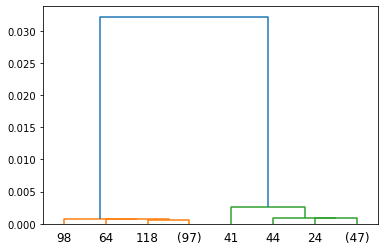

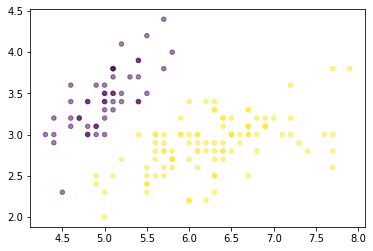

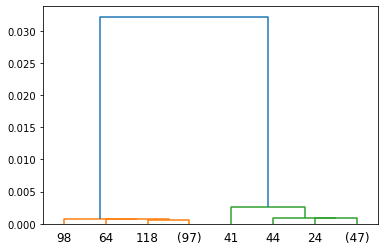

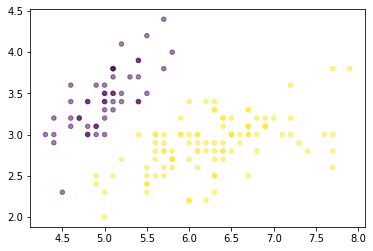

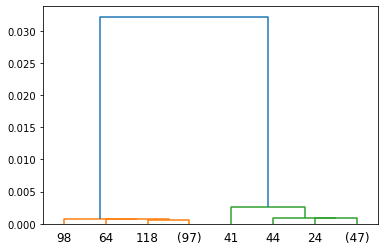

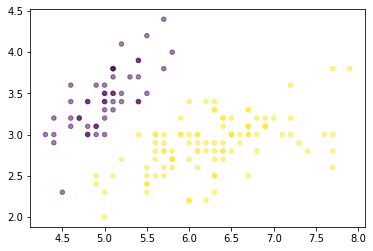

[0.6867350732769776]


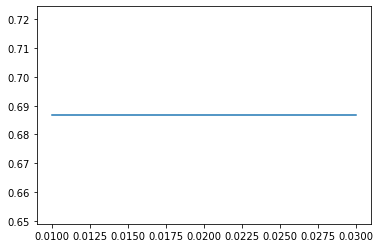

In [162]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot 
    dendrogram(linkage_matrix, **kwargs)
    
D_array=[0.010,0.020,0.030]
scores2=[]
threshold_distances = i

for i in D_array:
    AC = AgglomerativeClustering(n_clusters=None, affinity='cosine', memory=None
        , connectivity=None, compute_full_tree='auto', linkage='single', distance_threshold=i).fit(iris_data.data)
    plot_dendrogram(AC, truncate_mode="level", p=3)
    
    plt.show()
    plt.scatter(iris_data.data[:,0],iris_data.data[:,1],c = AC.labels_ ,alpha = 0.5,s = 20)
    plt.show()
    scores2.append(silhouette_score(iris_data.data, AC.labels_, metric='euclidean'))
    
#Plotting silhouette_scores and storing the best score
plt.plot(D_array,scores2)    
Best2=[]
Best2.append(max(scores2))
print(Best2)



### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

no_of_clusters: 16
noise: 1335
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
no_of_clusters: 14
noise: 942
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
no_of_clusters: 16
noise: 701
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
no_of_clusters: 11
noise: 523
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10]
no_of_clusters: 7
noise: 374
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6]
no_of_clusters: 7
noise: 231
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6]
no_of_clusters: 2
noise: 169
dbscan_cluster.labels_ [-1  0  1]
no_of_clusters: 1
noise: 128
dbscan_cluster.labels_ [-1  0]
no_of_clusters: 1
noise: 95
dbscan_cluster.labels_ [-1  0]
no_of_clusters: 1
noise: 59
dbscan_cluster.labels_ [-1  0]
no_of_clusters: 1
noise: 51
dbscan_cluster.labels_ [-1  0]
no_of_clusters: 1
noise: 39
dbscan_cluster.labels_ [-1  0]
no_of_clusters: 1
noise: 27
dbscan_cluster.labels_ [-1  0]
no_of_clusters: 1
nois

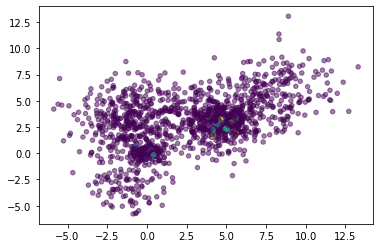

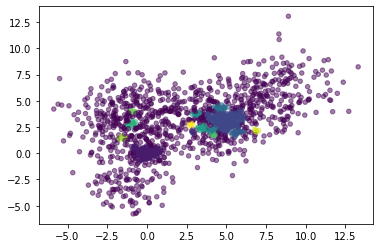

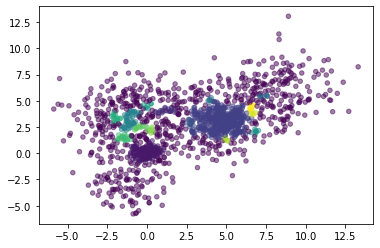

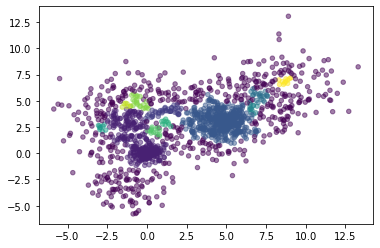

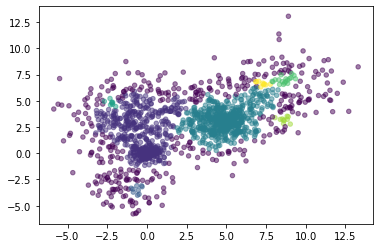

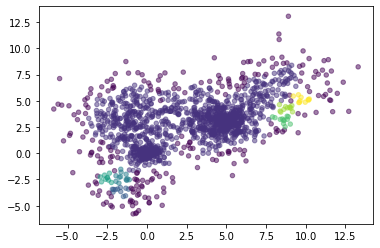

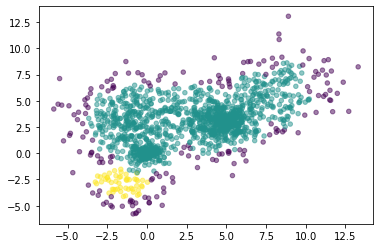

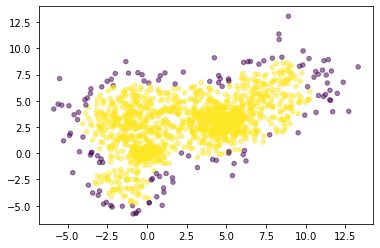

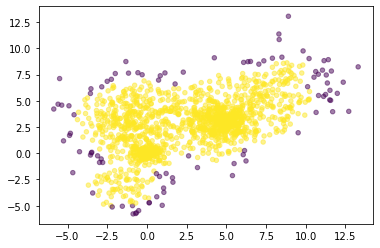

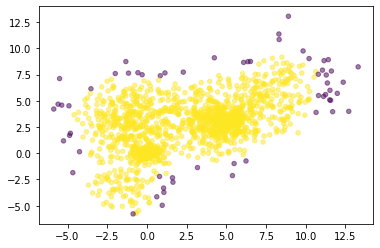

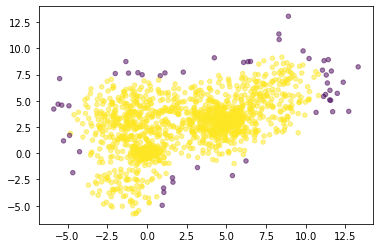

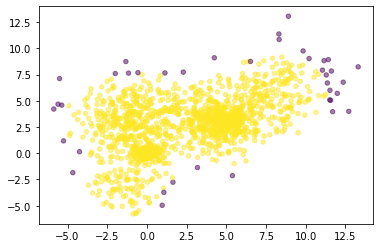

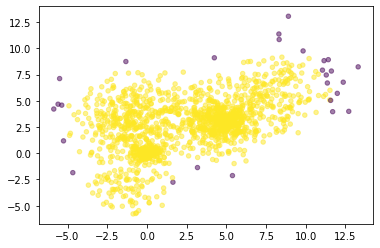

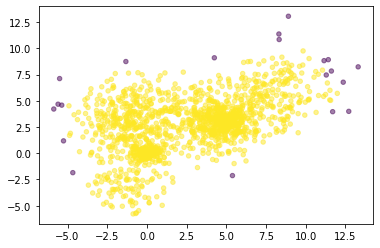

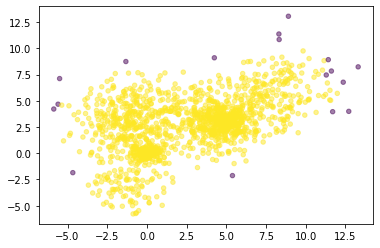

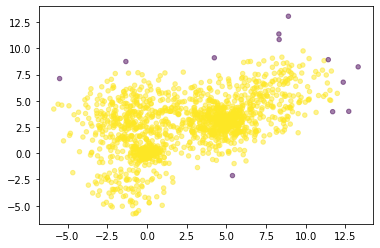

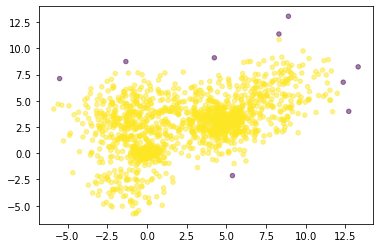

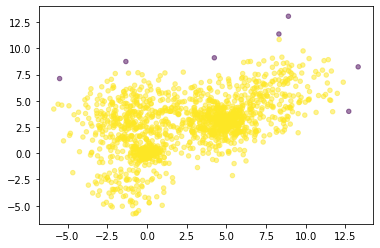

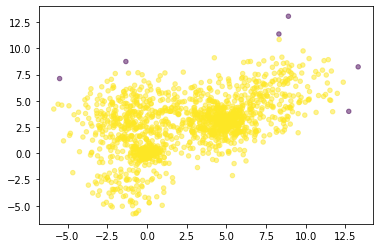

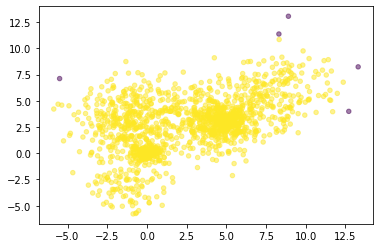

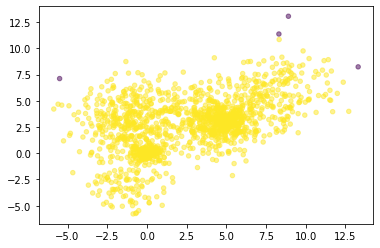

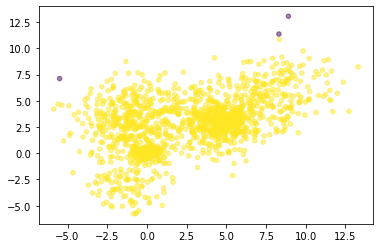

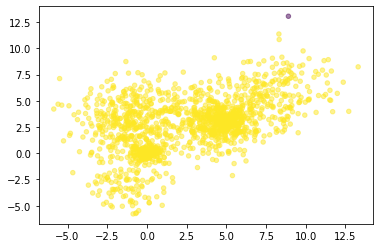

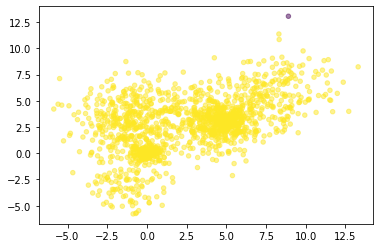

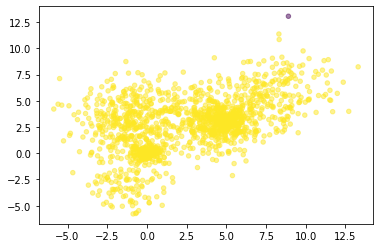

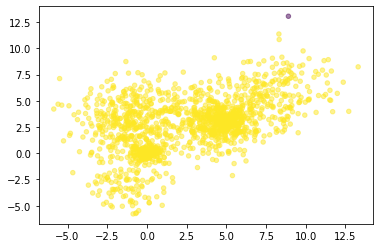

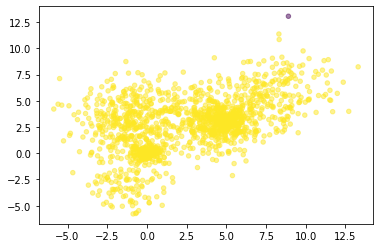

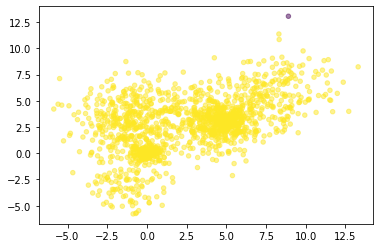

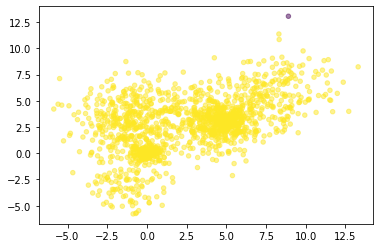

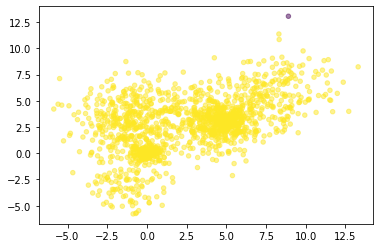

In [163]:
X=iris_data.data
def DBscan(EPS, Min_samples):
    cluster_stds=[1.4, 0.5, 1.8, 1.8, 0.9, 1.8]
    X, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,cluster_std=cluster_stds,centers=[(-1, -3), (0, 0), (4, 3), (-1, 3), (5, 3), (8, 6)], shuffle=False, random_state=42)
    X_scaled = X
    dbscan_cluster = DBSCAN(eps=EPS, min_samples=Min_samples)
    dbscan_cluster.fit(X)
    plt.figure()
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_cluster.labels_, cmap='viridis', alpha=0.5, s=20)
    labels = dbscan_cluster.labels_
    No_cluster = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(dbscan_cluster.labels_).count(-1)
    print('no_of_clusters: %d' % No_cluster)
    print('noise: %d' % n_noise)
    #print('v_measure =', v_measure_score(y, labels))
    print(f'dbscan_cluster.labels_ {np.unique(dbscan_cluster.labels_)}')
    return metrics.silhouette_score(X_scaled,dbscan_cluster.labels_,sample_size=1000,random_state=45)

initial = 0.1 
final = 3.1 
step = 0.1
maximum_list= np.arange(initial, final, step)

init = 5 
f = 36 
s = 1
Minimum_list= np.arange(init, f, s)

dbscan_array=np.ones(30)
for y in range(0,30):
    dbscan_array[y]=DBscan(maximum_list[y], Minimum_list[y])
plt.show()

0.5115047000438973
0.6867350732769776
0.681046169211746


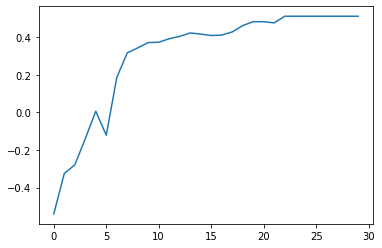

In [166]:
plt.plot(range(0, len(dbscan_array)),dbscan_array)
print(max(dbscan_array))
print(max(Best2))
print(max(Best1))
#Max value at Heirarchial, followed by Kmeans then DBSCAN

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

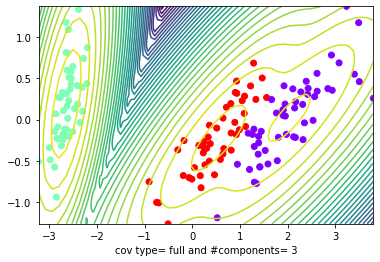

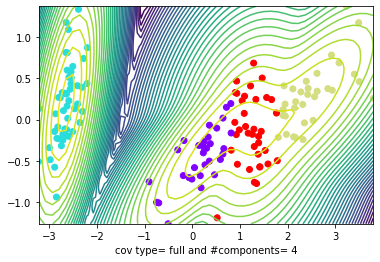

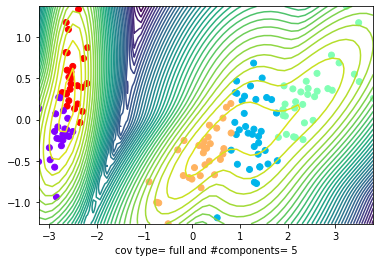

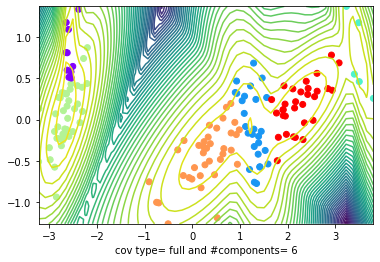

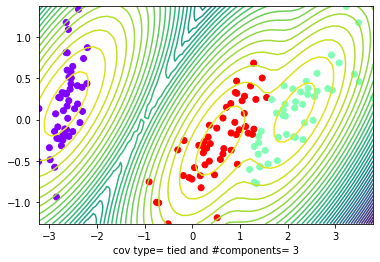

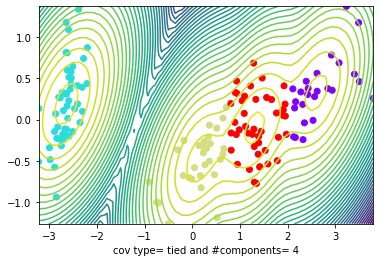

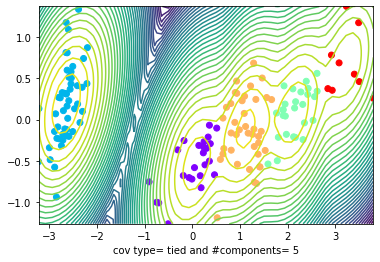

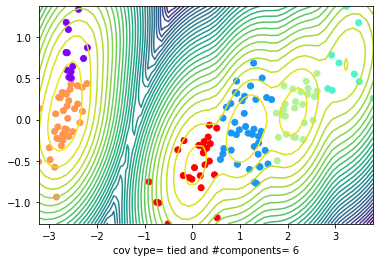

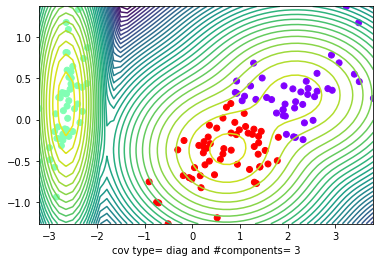

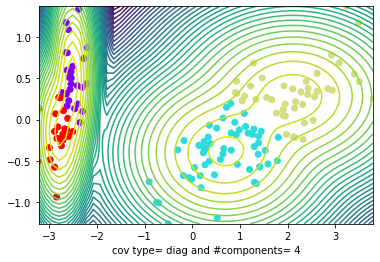

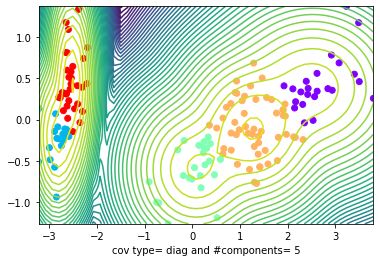

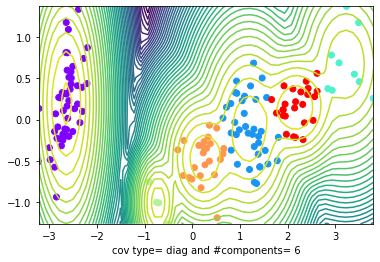

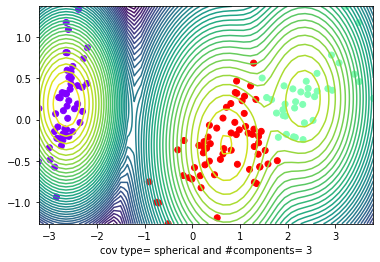

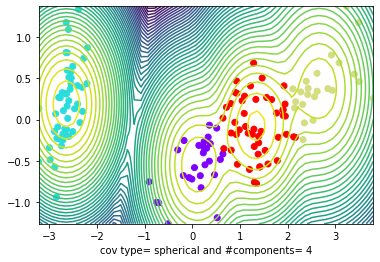

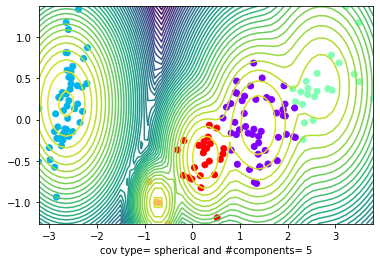

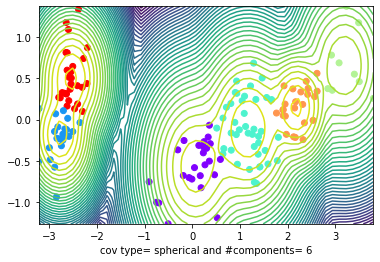

In [165]:
from sklearn.decomposition import PCA
import pandas as pd

cov = ["full","tied", "diag", "spherical"]
xlabel = []
silhouette_average = []
N =[3,4,5,6]

pca = PCA(2)
X_=pca.fit_transform(pd.DataFrame(iris_data.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']))
for type_ in cov:
    for num_ in N:
        gmm = GaussianMixture(n_components=num_, covariance_type=type_).fit(X_)
        labels = gmm.predict(X_)
        plt.figure()
        plt.xlabel(f"cov type= {type_} and #components= {num_}")
        plt.scatter(X_[:, 0], X_[:, 1], c=labels, cmap='rainbow')
        xmin = min(X_[:, 0])
        xmax = max(X_[:, 0])
        ymin = min(X_[:, 1])
        ymax = max(X_[:, 1])
        silhouette_avg = silhouette_score(X_, labels)
        silhouette_average.append(silhouette_avg)
        x = str(type_) + "," + str(num_)
        xlabel.append(x)

        X, Y = np.meshgrid(np.linspace(xmin, xmax), np.linspace(ymin, ymax))
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = gmm.score_samples(XX)
        Z = Z.reshape((50, 50))
        plt.contour(X, Y, Z, levels=40)
        
        plt.show()
best_sil = max(silhouette_average)
eps_min = xlabel[silhouette_average.index(best_sil)]

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 